In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
# import datawig

!pip install datawig

In [2]:
data = pd.read_csv('datasets/datascience_jobdata.csv')
data.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


In [3]:
data.shape

(19158, 13)

In [4]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [6]:
data.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
data.drop(['enrollee_id', 'city','city_development_index'], axis='columns', inplace=True)

In [8]:
# !pip install datawig

^C


<AxesSubplot:>

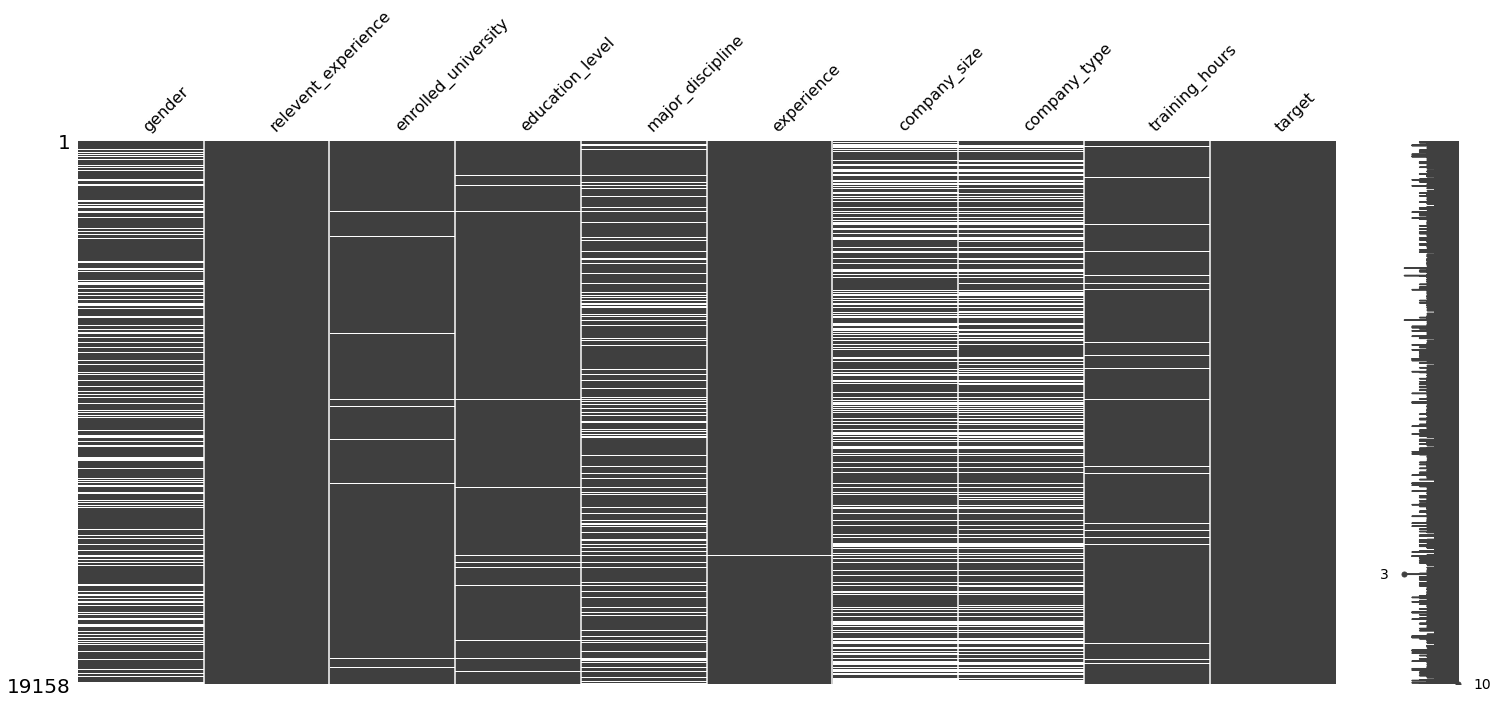

In [9]:
msno.matrix(data)

<AxesSubplot:xlabel='company_size', ylabel='Count'>

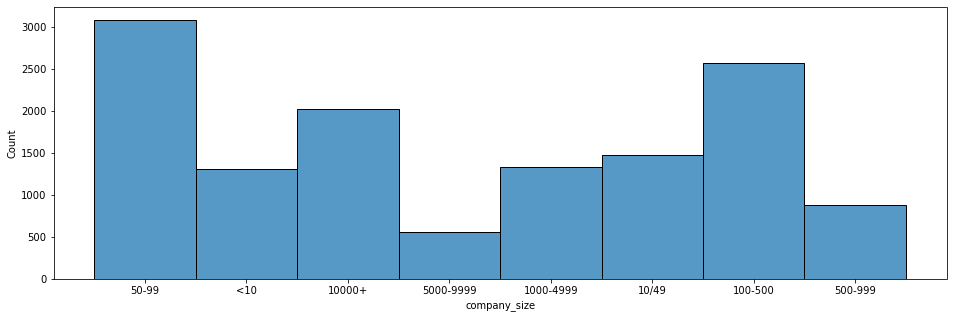

In [28]:
plt.figure(figsize=(16,5))
sns.histplot(data=data, x='company_size')

<AxesSubplot:xlabel='company_size', ylabel='count'>

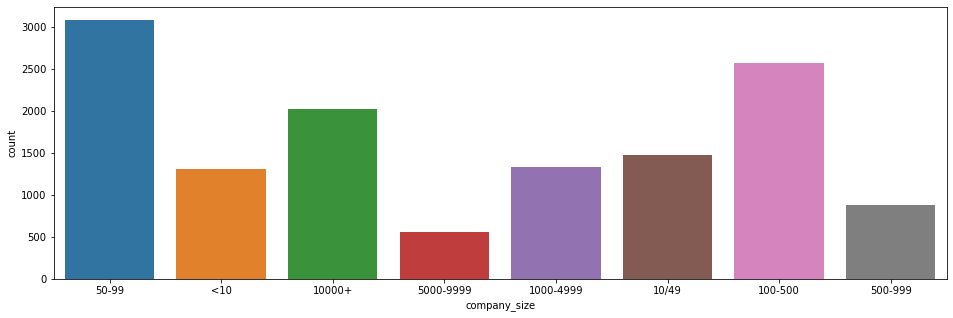

In [31]:
plt.figure(figsize=(16,5))
sns.countplot(data=data, x='company_size')

In [10]:
X = data.drop('target', axis=1)
y = data['target']

In [34]:
ct = ColumnTransformer(transformers=[
    
    
    ('ct1', SimpleImputer(strategy='most_frequent'),['gender','enrolled_university','education_level','major_discipline',
                                                     'company_size','company_type','company_type']),
    ('ct2', SimpleImputer(strategy='mean'),['experience', 'training_hours']),
], remainder='passthrough')
ct.fit_transform(X)[0]

array(['Male', 'no_enrollment', 'Graduate', 'STEM', '50-99', 'Pvt Ltd',
       'Pvt Ltd', 20.0, 36.0, 'Has relevent experience'], dtype=object)

In [35]:
data.head(1)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0


In [36]:
ct_second = ColumnTransformer([
    
    ('cts1', OneHotEncoder(handle_unknown='ignore'),[0,1,2,3,4,6,7] )
], remainder='passthrough')

In [39]:
pipe = Pipeline([
    ('p1', ct),
    ('p2', ct_second)
])

In [40]:
pipe.fit_transform(X)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [25]:
print('hello world')

hello world


In [37]:
ct_second.fit_transform(X)

<19158x41 sparse matrix of type '<class 'numpy.float64'>'
	with 171900 stored elements in Compressed Sparse Row format>

In [13]:
ct.fit_transform(X)[0]

array(['Male', 'no_enrollment', 'Graduate', 'STEM', '50-99', 'Pvt Ltd',
       20.0, 36.0, 'Has relevent experience'], dtype=object)

In [14]:
X.head(1)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0


In [15]:
print(data['training_hours'].median())
print(data['training_hours'].mean())

47.0
65.18578729882557


In [16]:
si = SimpleImputer(strategy='mean')
a = si.fit_transform(data[['training_hours']])

C:\Users\shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

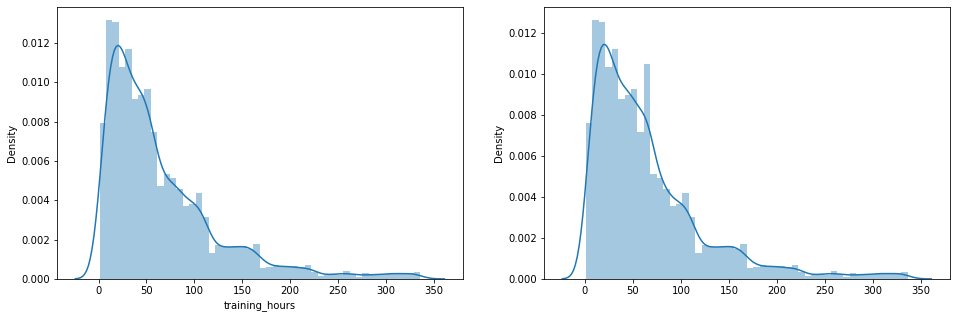

In [17]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(data['training_hours'])

plt.subplot(1,2,2)
sns.distplot(a)

In [18]:
data['experience'].value_counts()

20.0    3434
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
1.0      549
0.0      522
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
Name: experience, dtype: int64

In [19]:
data['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [20]:
data['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [21]:
data['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

<AxesSubplot:xlabel='education_level', ylabel='count'>

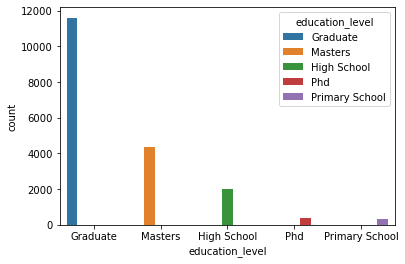

In [22]:
sns.countplot(x='education_level',data=data, hue='education_level')

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

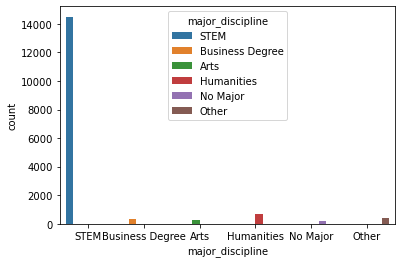

In [23]:
sns.countplot(x='major_discipline', data=data, hue='major_discipline')

In [24]:
data.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'training_hours', 'target'],
      dtype='object')